In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from statistics import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,recall_score, precision_score, f1_score

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/MiniProject/archive/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Drop column = 'id'
data.drop(columns='id', inplace=True)

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
round(data.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


**Missing Values Handling**

In [ ]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print((data.isna().sum()/len(data))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


 There is 201 samples with no values in bmi column , its about 4% of data. For better result we drop them.

In [ ]:
### Missing values in BMI columns is about 4% , we drop them.
data.dropna(how='any', inplace=True)

In [ ]:
data.shape

(4909, 11)

In [ ]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


# New Section

 We count number of unique values in each categorical column, to change them with integer values. Here we use .unique() command.


In [ ]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(data[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [ ]:
# gender
data_2 = data.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

# ever_married
data_2 =  data_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
data_2 =  data_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
data_2 =  data_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
data_2 =  data_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)


In [ ]:
def categorize_age_df(df):
    bin_age = [0, 18, 40, float("inf")]
    bin_bmi = [0, 30, 60, float("inf")]
    bin_glu = [0, 100, 200, float("inf")]
    labels = [0, 1, 2]
    df["age"] = pd.cut(df["age"], bins=bin_age, labels=labels)
    df["bmi"] = pd.cut(df["bmi"], bins=bin_bmi, labels=labels)
    df["avg_glucose_level"] = pd.cut(df["avg_glucose_level"], bins=bin_glu, labels=labels)
    return df

In [ ]:
data_3=categorize_age_df(data_2)

In [ ]:
data_3


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,2,0,1,0,0,0,2,1,0,1
2,0,2,0,1,0,0,1,1,1,1,1
3,1,2,0,0,0,0,0,1,1,2,1
4,1,2,1,0,0,1,1,1,0,1,1
5,0,2,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,0,0,1,3,1,1,0,3,0
5106,1,2,0,0,0,1,0,1,1,1,0
5107,1,1,0,0,0,1,1,0,1,1,0
5108,0,2,0,0,0,0,1,1,0,0,0


In [ ]:
df = pd.DataFrame(data)
cols=df.columns
print(cols)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


Normalization

In [ ]:
X= data_3.drop(columns='stroke')
y = data_3.stroke

 To decrease effect of larg values, we use MinMaxScaler to normalize X.

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,2,0,1,0,0,0,2,1,0
2,0,2,0,1,0,0,1,1,1,1
3,1,2,0,0,0,0,0,1,1,2
4,1,2,1,0,0,1,1,1,0,1
5,0,2,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5104,1,0,0,0,1,3,1,1,0,3
5106,1,2,0,0,0,1,0,1,1,1
5107,1,1,0,0,0,1,1,0,1,1
5108,0,2,0,0,0,0,1,1,0,0


confusion Metrics

define a function to ploting Confusion matrix

In [ ]:
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    plt.show()

In [ ]:
X = X.astype("int64")
y = y.astype("int64")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [ ]:
X_train = X_train.astype("int64")

**RandomForest**

In [ ]:
model_RF= RandomForestClassifier()
model_RF.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_RFC= model_RF.predict(X_test)

In [ ]:
accuracy_1 = accuracy_score(Y_test,y_RFC)
accuracy_1

0.9503257328990228

In [ ]:
recall_1=recall_score(Y_test,y_RFC,average='micro')
recall_1

0.9503257328990228

In [ ]:
precision_1 = precision_score(Y_test,y_RFC,average='micro')
precision_1

0.9503257328990228

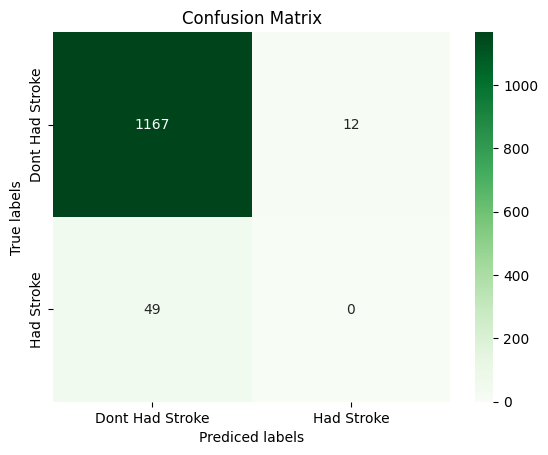

In [ ]:
plot_confusion_matrix(Y_test,y_RFC)

**NaiveBayes**

In [ ]:
model_NB= GaussianNB()
model_NB.fit(X_train,Y_train)
y_GNB=model_NB.predict(X_test)

In [ ]:
accuracy_2 = accuracy_score(Y_test,y_GNB)
accuracy_2

0.8550488599348535

In [ ]:
recall_2=recall_score(Y_test,y_GNB,average='micro')
recall_2

0.8550488599348535

In [ ]:
precision_2 = precision_score(Y_test,y_GNB,average='micro')
precision_2

0.8550488599348535

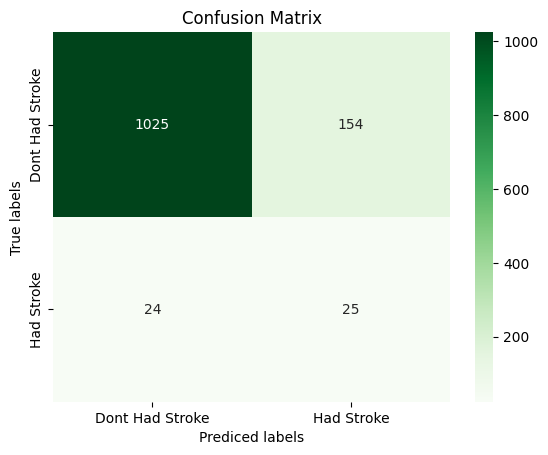

In [ ]:
plot_confusion_matrix(Y_test,y_GNB)

SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
accuracy_3=accuracy_score(Y_test,svm_pred)
print(accuracy_3)

0.9600977198697068


In [ ]:
recall_3=recall_score(Y_test,svm_pred,average='micro')
recall_3

0.9600977198697068

In [ ]:
precision_3 = precision_score(Y_test, svm_pred ,average='micro')
print(precision_3)

0.9600977198697068


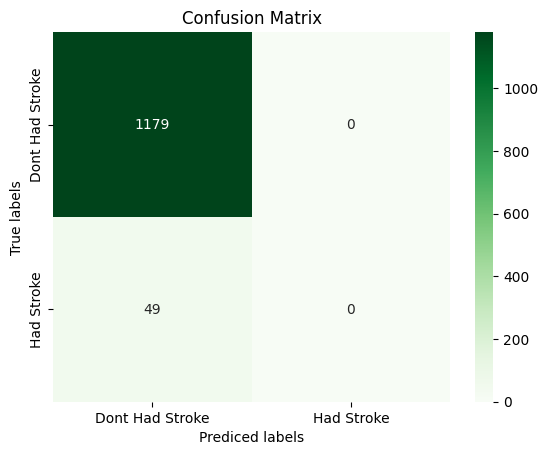

In [ ]:
plot_confusion_matrix(Y_test,svm_pred)

# New Section

**Combining Model**

In [ ]:
def pre_process(df_input):
  # gender
  df_input = df_input.replace(
      {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
  )

  # ever_married
  df_input =  df_input.replace(
      {'ever_married' : {'Yes' : 0, 'No' : 1}}
  )

  # work_type
  df_input =  df_input.replace(
      {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
  )
  # smoking_status
  df_input =  df_input.replace(
      {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
  )

  # Residence_type
  df_input =  df_input.replace(
      {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
  )
  bin_age = [0, 18, 40, float("inf")]
  bin_bmi = [0, 30, 60, float("inf")]
  bin_glu = [0, 100, 200, float("inf")]
  labels = [0, 1, 2]
  df_input["age"] = pd.cut(df_input["age"], bins=bin_age, labels=labels)
  df_input["bmi"] = pd.cut(df_input["bmi"], bins=bin_bmi, labels=labels)
  df_input["avg_glucose_level"] = pd.cut(df_input["avg_glucose_level"], bins=bin_glu, labels=labels)
  return df_input

In [ ]:
def Predictions(input_data):
    rf_prediction =model_RF.predict(input_data)[0]
    nb_prediction = model_NB.predict(input_data)[0]
    svm_prediction = svm_model.predict(input_data)[0]

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

In [ ]:
cols = ["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"]
input_user = "Male,67,0,1,Yes,Private,Urban,222.69,36.6,formerly smoked"
l = input_user.split(",")
for i in range(len(l)):
  if l[i].isnumeric():
    l[i]=int(l[i])
l[7]=float(l[7])
l[8]=float(l[8])
df_input = pd.DataFrame([l], columns=cols)
df_input.info()
print(l)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1 non-null      object 
 1   age                1 non-null      int64  
 2   hypertension       1 non-null      int64  
 3   heart_disease      1 non-null      int64  
 4   ever_married       1 non-null      object 
 5   work_type          1 non-null      object 
 6   Residence_type     1 non-null      object 
 7   avg_glucose_level  1 non-null      float64
 8   bmi                1 non-null      float64
 9   smoking_status     1 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 208.0+ bytes
['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 222.69, 36.6, 'formerly smoked']


In [ ]:
dd=pre_process(df_input)
dd

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,2,0,1,0,0,0,2,1,0


In [ ]:
dd = dd.astype("int64")

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             1 non-null      int64
 1   age                1 non-null      int64
 2   hypertension       1 non-null      int64
 3   heart_disease      1 non-null      int64
 4   ever_married       1 non-null      int64
 5   work_type          1 non-null      int64
 6   Residence_type     1 non-null      int64
 7   avg_glucose_level  1 non-null      int64
 8   bmi                1 non-null      int64
 9   smoking_status     1 non-null      int64
dtypes: int64(10)
memory usage: 208.0 bytes


In [ ]:
s = np.array([0,2,0,1,0,0,0,2,1,0])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 242 to 2865
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             3681 non-null   int64   
 1   age                3681 non-null   category
 2   hypertension       3681 non-null   int64   
 3   heart_disease      3681 non-null   int64   
 4   ever_married       3681 non-null   int64   
 5   work_type          3681 non-null   int64   
 6   Residence_type     3681 non-null   int64   
 7   avg_glucose_level  3681 non-null   category
 8   bmi                3681 non-null   category
 9   smoking_status     3681 non-null   int64   
dtypes: category(3), int64(7)
memory usage: 241.2 KB


In [ ]:
dd=dd.astype("int64")
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             1 non-null      int64
 1   age                1 non-null      int64
 2   hypertension       1 non-null      int64
 3   heart_disease      1 non-null      int64
 4   ever_married       1 non-null      int64
 5   work_type          1 non-null      int64
 6   Residence_type     1 non-null      int64
 7   avg_glucose_level  1 non-null      int64
 8   bmi                1 non-null      int64
 9   smoking_status     1 non-null      int64
dtypes: int64(10)
memory usage: 208.0 bytes


In [ ]:
model_RF.predict(dd)

array([1])

In [ ]:
model_NB.predict(dd)

array([1])

In [ ]:
svm_model.predict(dd)[0]

0

In [ ]:
mode([1,1,0])

1

In [ ]:
Predictions(dd)

{'rf_model_prediction': 1,
 'naive_bayes_prediction': 1,
 'svm_model_prediction': 0,
 'final_prediction': 1}

The patient is likely to get a stroke .